In [176]:
import pandas as pd 
import numpy as np
from sklearn import datasets

In [177]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.
import matplotlib.pyplot as pl
matplotlib.style.use('ggplot')


# HELPER FUNCTION TO HELP USE DERIVE THE DIFFERENT PAIRS IN THE DATA
def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


In [178]:
# get the iris dataset using the code snippet provided
iris_file_URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(iris_file_URL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'], 
                  header=None)


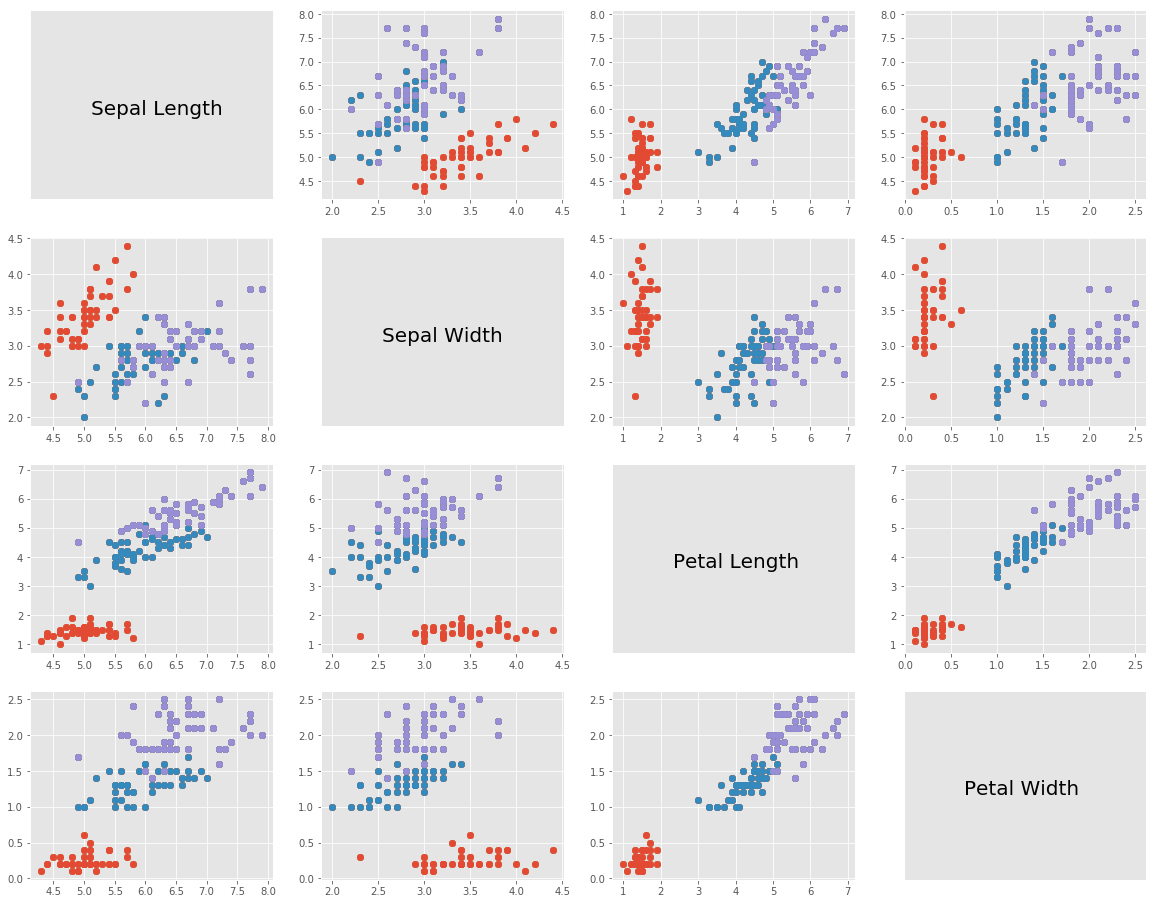

In [179]:
iris = iris.dropna()
pairs(iris)

## 1) First Pair : Sepal Length and Sepal Width
+ ___Sepal length : Target ___
+ ___Sepal Width : Independent___

In [180]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [181]:
sepal_length_data = iris["Sepal Length"] # Target 
sepal_width_data = iris["Sepal Width"] # Indepedent feature

In [182]:
# Create linear regression object 
regr1 = linear_model.LinearRegression()

In [183]:
# Split the data with shuffling 
Sepal_width_train, Sepal_width_test, Sepal_length_train, Sepal_length_test = train_test_split(sepal_width_data, 
                                                                                             sepal_length_data,
                                                                                             test_size=0.3,
                                                                                             random_state=0)

In [184]:
sepal_width_train = Sepal_width_train.values.reshape(105,1)
sepal_width_test = Sepal_width_test.values.reshape(45,1)

In [185]:
regr1.fit(sepal_width_train, Sepal_length_train)
sepal_len_predicted = regr1.predict(sepal_width_test)

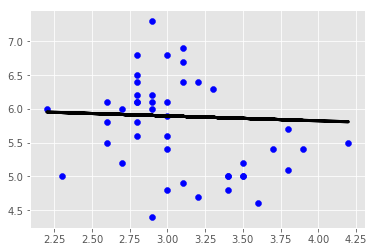

In [186]:
# Plot the results 
plt.scatter(sepal_width_test, Sepal_length_test, color="blue")
plt.plot(sepal_width_test, sepal_len_predicted, color="black", linewidth= 3)
plt.show()

In [187]:
# Metrics
# The coeffiecients 
print("Coefficients : ", regr.coef_[0])
print("Intercept : ", regr.intercept_)
# The mean squared error
print("Mean squared error: %2f " % mean_squared_error(Sepal_length_test, sepal_len_predicted))
# Variance scors
print("Variance score: %2f " % r2_score(Sepal_length_test, sepal_len_predicted))

Coefficients :  0.93423124567
Intercept :  4.74734300531
Mean squared error: 0.488351 
Variance score: -0.030373 


## 2) Second Pair : Sepal Length and Petal Length
+ ___Sepal length : Target ___
+ ___Petal length : Independent___

In [188]:
sepal_l_data = iris["Sepal Length"] # Target 
sepal_w_data = iris["Petal Length"] # Indepedent feature

In [189]:
petal_l_train, petal_l_test, sepal_l_train, sepal_l_test = train_test_split(sepal_w_data, 
                                                                           sepal_l_data, 
                                                                           test_size=0.3,
                                                                           random_state=0)

In [190]:
# Create linear regression object 
regr2 = linear_model.LinearRegression()

In [191]:
petal_l_train = petal_l_train.values.reshape(105,1)
petal_l_test = petal_l_test.values.reshape(45,1)

In [192]:
# train the model with petal length train and sepal length train
regr2.fit(petal_l_train, sepal_l_train)
# pass in the X test values and get the predicted Y values
sepal_l_predicted = regr2.predict(petal_l_test)

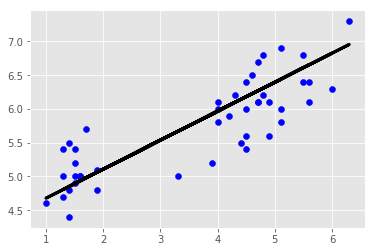

In [193]:
# Plot the outputs 
plt.scatter(petal_l_test, sepal_l_test, color="blue")
plt.plot(petal_l_test, sepal_l_predicted, color="black", linewidth= 3)
plt.title = "Sepal Length vs "
plt.show()


In [194]:
# Metrics
# The coeffiecients 
print("Coefficients : ", regr2.coef_[0])
print("Intercept : ", regr2.intercept_)
# The mean squared error
print("Mean squared error: %2f " % mean_squared_error(sepal_l_test, sepal_l_predicted))
# Variance scors
print("Variance score: %2f " % r2_score(sepal_l_test, sepal_l_predicted))

Coefficients :  0.429704899777
Intercept :  4.24817743133
Mean squared error: 0.163351 
Variance score: 0.655345 


## Abstraction of common procedures

In [195]:
def perform_linear_regression(target_feature, independent_feature):
    # get target data column from iris datagram
    target_data = iris[target_feature] # Target 
    # get independent data column from iris datagram
    independ_feature_data = iris[independent_feature] 
    # create regression object
    regr = linear_model.LinearRegression()
    # split the data for testing and training 
    # training -> 0.7
    # testing -> 0.3 
    ind_train, ind_test, target_train, target_test = train_test_split(independ_feature_data,
                                                                      target_data,
                                                                      test_size=0.3,
                                                                      random_state=0)
    ind_train = ind_train.values.reshape(105,1)
    ind_test = ind_test.values.reshape(45,1)
    # train the model with training data
    regr.fit(ind_train, target_train)
    # get the predicted target values 
    target_predicted = regr.predict(ind_test)
    # return turple of independent test data, target test data, predicted_target_data, regression model
    # -> to be used in metrics and ploting
    return ind_test, target_test, target_predicted, regr


In [196]:
def plot_regression_output(ind_test, target_test, target_predicted):
    # Plot the outputs 
    plt.scatter(ind_test, target_test, color="blue")
    plt.plot(ind_test, target_predicted, color="black", linewidth= 3)
    plt.show()


In [213]:
def show_evaluation_metrics(regr, target_test, target_predicted):
    # Metrics
    # The coeffiecients 
    print("Coefficients : ", regr.coef_[0])
    print("Intercept : ", regr.intercept_)
    # The mean squared error
    print("Mean squared error: %2f " % mean_squared_error(target_test, target_predicted))
    # Variance scors
    print("Variance score: %2f " % r2_score(target_test, target_predicted))

## 3) Third Pair : Sepal Length and Petal Width
+ ___Sepal Length : Target ___
+ ___Petal Width : Independent___

+ ** Use abstraction to plot and evaluate regression between the features Petal Width and Sepal Length  where
the petal width is the INDEPEDENT FEATURE and sepal length is the TARGET FEATURE **

In [199]:
# select the data
sepal_l_y = iris["Sepal Length"]
petal_w_x = iris["Petal Width"]
# Split data 
petal_w_x_train, petal_w_x_test, sepal_l_y_train, sepal_l_y_test = train_test_split(petal_w_x,
                                                                                   sepal_l_y,
                                                                                   test_size=0.3,
                                                                                   random_state=0)
# create regression object
regr3 = linear_model.LinearRegression()
# Reshape the indepedent data
petal_w_x_train = petal_w_x_train.values.reshape(105,1)
petal_w_x_test = petal_w_x_test.values.reshape(45,1)
# Fit the model 
regr3.fit(petal_w_x_train, sepal_l_y_train )
sepal_l_y_pred = regr3.predict(petal_w_x_test)


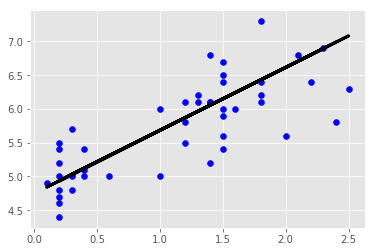

In [200]:
# Plot the outputs 
plt.scatter(petal_w_x_test, sepal_l_y_test, color="blue")
plt.plot(petal_w_x_test, sepal_l_y_pred, color="black", linewidth= 3)
plt.show()

In [214]:
# Metrics
# The coeffiecients 
print("Coefficients : ", regr3.coef_[0])
print("Intercept : ", regr3.intercept_)
# The mean squared error
print("Mean squared error: %2f " % mean_squared_error(sepal_l_y_test, sepal_l_y_pred))
# Variance scors
print("Variance score: %2f " % r2_score(sepal_l_y_test, sepal_l_y_pred))

Coefficients :  0.93423124567
Intercept :  4.74734300531
Mean squared error: 0.212195 
Variance score: 0.552289 


## 4) Fourth Pair : Sepal Width and Sepal Length  < reverse of (1) >
+ ___Sepal Width  : Target ___
+ ___Sepal Length : Independent___

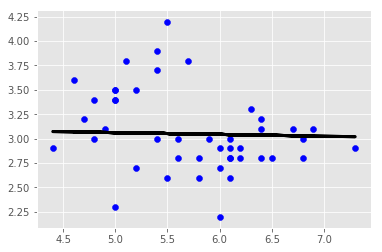

In [202]:
sepal_l_test, sepal_w_test, sepal_w_predicted, sepal_w_regr = perform_linear_regression('Sepal Width', 'Sepal Length')
plot_regression_output(sepal_l_test, sepal_w_test, sepal_w_predicted)

In [215]:
show_evaluation_metrics(sepal_w_regr, sepal_w_test, sepal_w_predicted )

Coefficients :  -0.0182412378697
Intercept :  3.15226359994
Mean squared error: 7.667720 
Variance score: 0.014578 


## 5) Fifth Pair : Sepal Width and Petal Length 
+ ___Sepal Width  : Target ___
+ ___Petal Length : Independent___

In [216]:
petal_l_x_test, sepal_w_y_test, sepal_w_y_pred, sepal_w_y_petal_l_x_regr = perform_linear_regression('Sepal Width',
                                                                                                    'Petal Length')

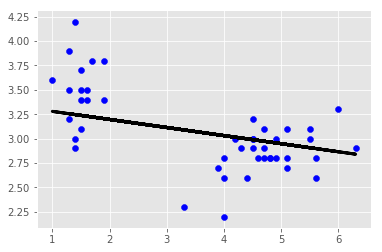

In [217]:
plot_regression_output(petal_l_x_test, sepal_w_y_test, sepal_w_y_pred)

In [218]:
show_evaluation_metrics(sepal_w_y_petal_l_x_regr,
                       petal_l_x_test,
                       sepal_l_y_pred)

Coefficients :  -0.0828946480394
Intercept :  3.36212998583
Mean squared error: 0.212195 
Variance score: -1.180245 


## 6) Sixth Pair : Sepal Width and Petal Width 
+ ___Sepal Width  : Target ___
+ ___Petal Width : Independent___

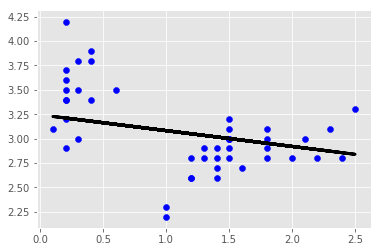

In [229]:
petal_w_x_test, sepal_w_y_test, sepal_w_y_pred, regr6 = perform_linear_regression('Sepal Width', 'Petal Width')
plot_regression_output(petal_w_x_test, sepal_w_y_test,sepal_w_y_pred )

In [230]:
show_evaluation_metrics(regr6, sepal_w_y_test, sepal_w_y_pred )

Coefficients :  -0.161960150329
Intercept :  3.2434330225
Mean squared error: 7.722933 
Variance score: 0.222570 


## 7) Seventh Pair : Petal Length  and Sepal Length 
+ ___Petal Length  : Target ___
+ ___Sepal Length : Independent___

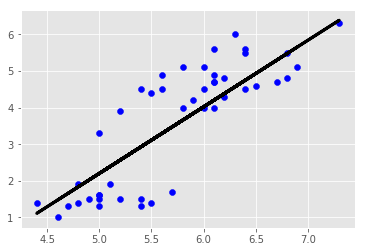

In [232]:
# NOTE : CHANGE VARIABLE NAMING CONVENSION 
# Can no longer use the regular variable naming method because of repition of names
ind7_test, target7_test, target7_predicted, regr7 = perform_linear_regression('Petal Length', 'Sepal Length')
plot_regression_output(ind7_test, target7_test, target7_predicted )


In [233]:
show_evaluation_metrics(regr7, target7_test, target7_predicted )

Coefficients :  1.81991362924
Intercept :  -6.89678622641
Mean squared error: 5.164845 
Variance score: 0.694386 


## 8) Eigth Pair : Petal Length  and Sepal Width
+ ___Petal Length  : Target ___
+ ___Sepal Width : Independent___

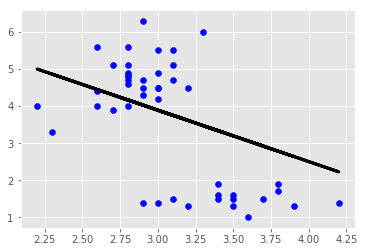

In [234]:
ind8_test, target8_test, target8_predicted, regr8 = perform_linear_regression('Petal Length', 'Sepal Width')
plot_regression_output(ind8_test, target8_test, target8_predicted )

In [235]:
show_evaluation_metrics(regr8, target8_test, target8_predicted )

Coefficients :  -1.38572623939
Intercept :  8.04777789269
Mean squared error: 4.309534 
Variance score: 0.307393 


## 9) Ninth Pair : Petal Length  and Petal Width
+ ___Petal Length  : Target ___
+ ___Petal Width : Independent___

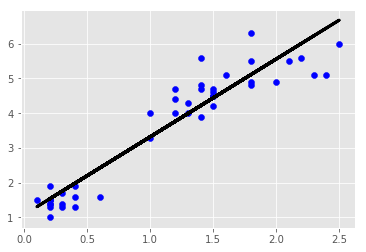

In [237]:
ind9_test, target9_test, target9_predicted, regr9 = perform_linear_regression('Petal Length', 'Petal Width')
plot_regression_output(ind9_test, target9_test, target9_predicted )

In [238]:
show_evaluation_metrics(regr8, target8_test, target8_predicted )

Coefficients :  -1.38572623939
Intercept :  8.04777789269
Mean squared error: 4.309534 
Variance score: 0.307393 


## 10) Tenth Pair : Petal Width and Sepal Length
+ ___Petal Width  : Target ___
+ ___Sepal Length : Independent___

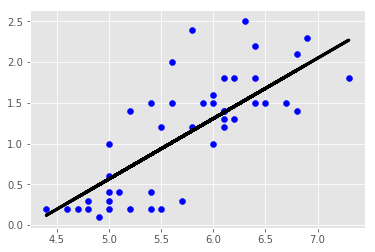

In [239]:
ind10_test, target10_test, target10_predicted, regr10 = perform_linear_regression('Petal Width', 'Sepal Length')
plot_regression_output(ind10_test, target10_test, target10_predicted )

In [240]:
show_evaluation_metrics(regr10, target10_test, target10_predicted )

Coefficients :  0.741929836262
Intercept :  -3.14577316837
Mean squared error: 21.409751 
Variance score: 0.597426 


## 11) Tenth Pair : Petal Width and  Sepal Width
+ ___Petal Width  : Target ___
+ ___Sepal Width : Independent___

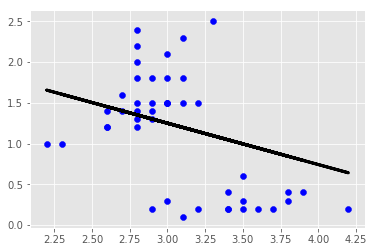

In [243]:
ind11_test, target11_test, target11_predicted, regr11 = perform_linear_regression('Petal Width', 'Sepal Width')
plot_regression_output(ind11_test, target11_test, target11_predicted )

In [242]:
show_evaluation_metrics(regr10, target10_test, target10_predicted )

Coefficients :  0.741929836262
Intercept :  -3.14577316837
Mean squared error: 21.409751 
Variance score: 0.597426 


## 12) Tenth Pair : Petal Width and  Petal Length
+ ___Petal Width  : Target ___
+ ___Petal Length : Independent___

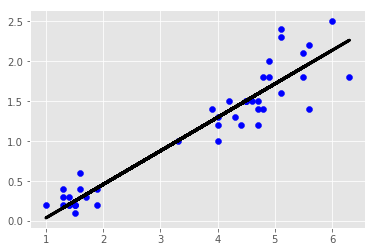

In [244]:
ind12_test, target12_test, target12_predicted, regr12 = perform_linear_regression('Petal Width', 'Petal Length')
plot_regression_output(ind12_test, target12_test, target12_predicted )

In [245]:
show_evaluation_metrics(regr12, target12_test, target12_predicted )

Coefficients :  0.419400013498
Intercept :  -0.379036242154
Mean squared error: 21.293712 
Variance score: 0.895038 


## Response to questions 

1) The pair of features that seem to be most predictive of one another are Sepal length and Petal Length, those combination have the lowest error compared to the other, as well as having the a high variance. A high variance suggests that most variability can be explained by the regression model
    a. Petal length [target ], Sepal Length [independent ]
        + Mean squared error : 5.164845
        + Variance Score : 0.694386
    b. Sepal length [target ], Petal Length [independent ]
        + Mean squared error : 0.163351
        + Variance Score : 0.655345
2) You are trying to generate a classification model on this dataset, but only after removing the feature that you were able to predict accurately based on the other features. So the feature you remove is the target, I think the performance would not be effected becasue the feature removed is the one that is predicted accurately, the features that are still available will still be able to perform since they don't depend on the target. 